In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
customer_segment = pd.read_csv("C:\\Users\\zisan\\Downloads\\Exploratory projects\\Bolt\\Customer-Segmentation-for-Personalized-Marketing\\customer_segmentation_data.csv")

In [8]:
customer_segment.head()

,ride_id,ride_type,payment_method,payment_amount,customer_rating,ride_cancellation,fraud_flag,is_high_value_ride,ride_timestamp
0,19b1cc2f-c3e3-47fe-90ca-34659607baba,Scooter,Cash,97.51,3.75,True,True,True,2025-01-01 11:28:40
1,0cb88b96-62de-4484-8036-327ec4ecb365,Food Delivery,PayPal,56.70,2.25,True,False,True,2025-01-02 07:55:00
2,e183628c-0159-4839-ba0d-657f7e6c93b9,Scooter,Mobile Wallet,31.15,1.24,False,True,False,2025-01-01 00:47:38
3,1ca29f57-c36f-4448-9b8e-308023a2c00f,Scooter,PayPal,72.40,3.81,True,True,True,2025-01-02 16:05:47
4,e4640f6e-1306-4329-83ec-0e737d6560a5,Package Delivery,Debit Card,30.79,1.04,False,False,False,2025-01-02 10:46:47


In [10]:
customer_segment.isna().sum()

ride_id               0
ride_type             0
payment_method        0
payment_amount        0
customer_rating       0
ride_cancellation     0
fraud_flag            0
is_high_value_ride    0
ride_timestamp        0
dtype: int64

In [ ]:
# Average Customer Rating for Each Ride Type

In [16]:
avg_rating = customer_segment.groupby('ride_type')['customer_rating'].mean()
print(avg_rating)

ride_type
Food Delivery       2.991984
Package Delivery    2.976347
Scooter             3.068621
Taxi                2.935133
Name: customer_rating, dtype: float64


In [ ]:
#  Distribution of Payment Methods Across Ride Types

In [17]:
payment_method_dist = customer_segment.groupby('ride_type')['payment_method'].value_counts().unstack(fill_value=0)
print(payment_method_dist)

payment_method    Cash  Credit Card  Debit Card  Mobile Wallet  PayPal
ride_type                                                             
Food Delivery       40           51          49             60      57
Package Delivery    50           38          42             50      39
Scooter             49           48          56             55      53
Taxi                50           58          50             47      58


In [ ]:
# Correlation Between Payment Amount and Customer Rating

In [18]:
correlation = customer_segment[['payment_amount', 'customer_rating']].corr()
print(correlation)

                 payment_amount  customer_rating
payment_amount         1.000000        -0.027088
customer_rating       -0.027088         1.000000


In [ ]:
# Impact of Ride Cancellation on Fraud Flag Status

In [19]:
cancellation_fraud_impact = customer_segment.groupby('ride_cancellation')['fraud_flag'].value_counts(normalize=True).unstack()
print(cancellation_fraud_impact)


fraud_flag            False     True 
ride_cancellation                    
False              0.487329  0.512671
True               0.505133  0.494867


In [ ]:
# Distribution of Customer Ratings for Each Ride Type

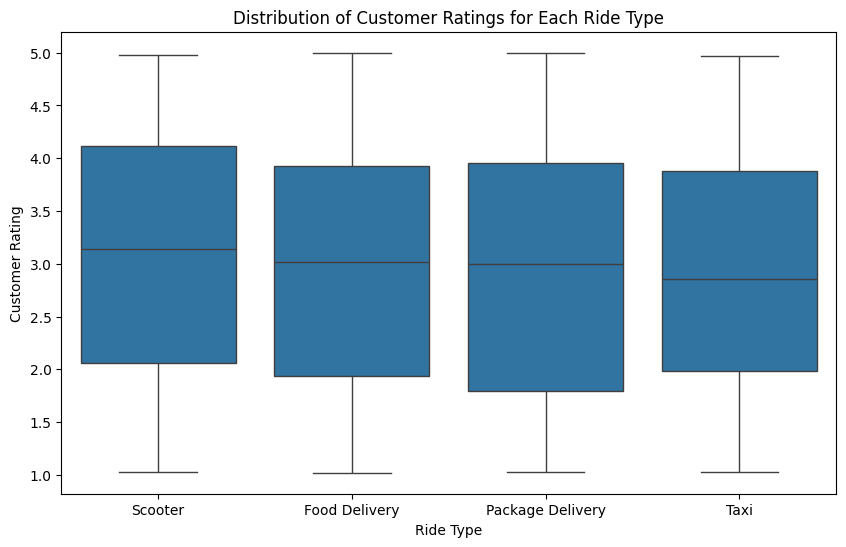

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_segment, x='ride_type', y='customer_rating')
plt.title('Distribution of Customer Ratings for Each Ride Type')
plt.xlabel('Ride Type')
plt.ylabel('Customer Rating')
plt.show()

In [ ]:
# Percentage of High-Value Rides and Their Average Rating

In [20]:
high_value_rides = customer_segment[customer_segment['is_high_value_ride'] == True]
high_value_percentage = len(high_value_rides) / len(customer_segment) * 100
avg_high_value_rating = high_value_rides['customer_rating'].mean()

print(f"High-value rides percentage: {high_value_percentage}%")
print(f"Average rating for high-value rides: {avg_high_value_rating}")


High-value rides percentage: 51.300000000000004%
Average rating for high-value rides: 2.9398245614035083


In [ ]:
# Trend of Ride Bookings Over Time (Per Day or Hour)

In [21]:
customer_segment['ride_timestamp'] = pd.to_datetime(customer_segment['ride_timestamp'])
customer_segment['hour'] = customer_segment['ride_timestamp'].dt.hour

# To see bookings per hour
bookings_per_hour = customer_segment.groupby('hour').size()
print(bookings_per_hour)


hour
0     40
1     30
2     33
3     46
4     42
5     46
6     46
7     47
8     43
9     33
10    43
11    30
12    63
13    40
14    50
15    44
16    41
17    45
18    45
19    35
20    39
21    42
22    31
23    46
dtype: int64


In [ ]:
# Average Payment Amount for Fraudulent vs. Non-Fraudulent Rides

In [22]:
avg_payment_fraud = customer_segment.groupby('fraud_flag')['payment_amount'].mean()
print(avg_payment_fraud)


fraud_flag
False    50.856331
True     52.785853
Name: payment_amount, dtype: float64


In [ ]:
# Payment Amount Variation by Ride Type and Payment Method

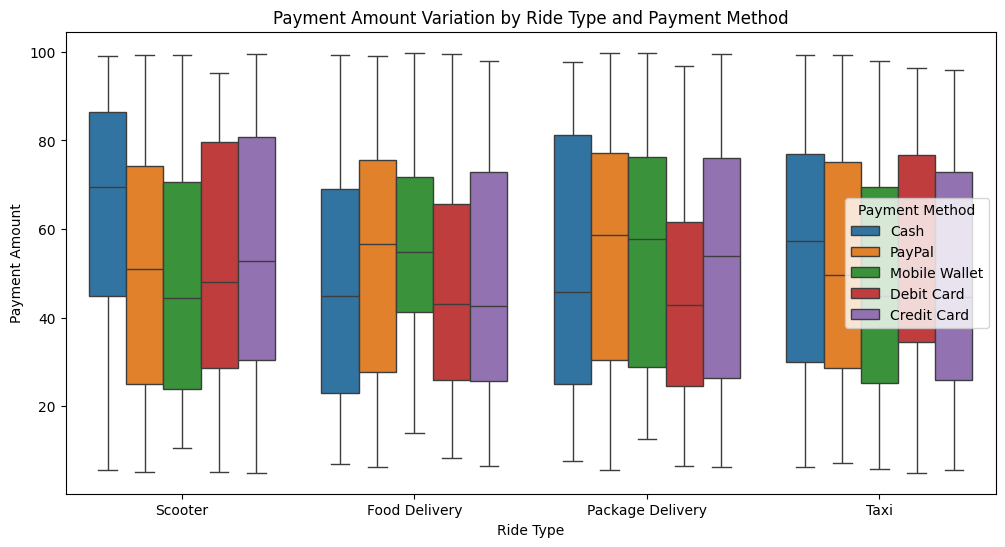

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=customer_segment, x='ride_type', y='payment_amount', hue='payment_method')
plt.title('Payment Amount Variation by Ride Type and Payment Method')
plt.xlabel('Ride Type')
plt.ylabel('Payment Amount')
plt.legend(title='Payment Method')
plt.show()

In [ ]:
# Cancellation Rate Across Different Ride Types

In [23]:
cancellation_rate = customer_segment.groupby('ride_type')['ride_cancellation'].mean()
print(cancellation_rate)


ride_type
Food Delivery       0.470817
Package Delivery    0.488584
Scooter             0.475096
Taxi                0.513308
Name: ride_cancellation, dtype: float64


In [ ]:
# Customer Ratings for Different Payment Methods

In [24]:
rating_by_payment = customer_segment.groupby('payment_method')['customer_rating'].describe()
print(rating_by_payment)


                count      mean       std   min     25%    50%   75%   max
payment_method                                                            
Cash            189.0  2.810000  1.160897  1.03  1.7700  2.670  3.75  5.00
Credit Card     195.0  3.026564  1.183459  1.02  1.8950  3.150  4.05  5.00
Debit Card      197.0  3.055990  1.142358  1.03  2.1000  3.020  4.03  4.99
Mobile Wallet   212.0  3.138302  1.114450  1.06  2.2375  3.165  4.16  4.94
PayPal          207.0  2.922657  1.181199  1.03  1.8550  2.880  3.91  4.99


In [ ]:
# Ride Bookings Trend Over Time (Hourly or Daily)

C:\Users\zisan\AppData\Local\Temp\ipykernel_1808\3816071981.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_segment, x='hour', palette='viridis')


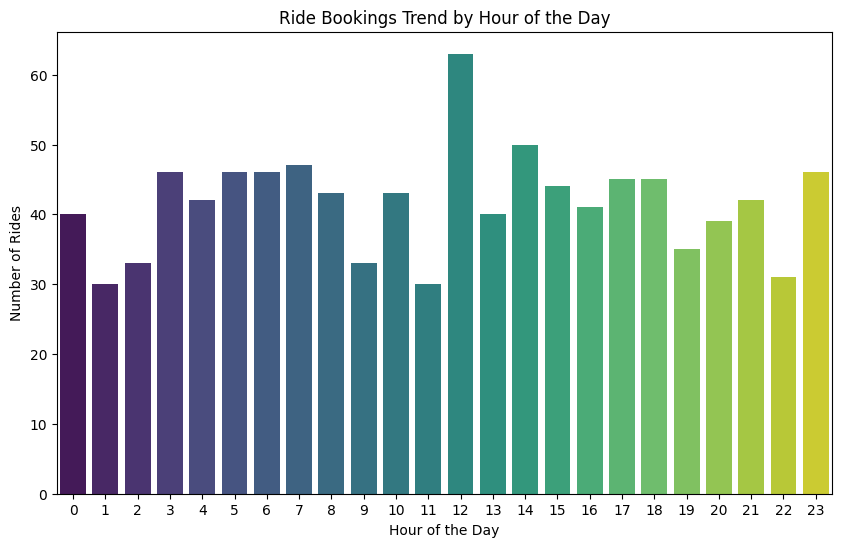

In [28]:
customer_segment['ride_timestamp'] = pd.to_datetime(customer_segment['ride_timestamp'])
customer_segment['hour'] = customer_segment['ride_timestamp'].dt.hour

plt.figure(figsize=(10, 6))
sns.countplot(data=customer_segment, x='hour', palette='viridis')
plt.title('Ride Bookings Trend by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()

In [ ]:
#  Payment Amount and Payment Method in Relation to High-Value Ride Status

In [25]:
payment_high_value = customer_segment.groupby(['payment_method', 'is_high_value_ride'])['payment_amount'].mean().unstack()
print(payment_high_value)


is_high_value_ride      False      True 
payment_method                          
Cash                26.282619  76.917143
Credit Card         26.872000  74.647053
Debit Card          28.602170  74.660549
Mobile Wallet       29.494854  73.216147
PayPal              26.415957  74.677257


In [ ]:
#  Relationship Between Payment Amount and Customer Rating

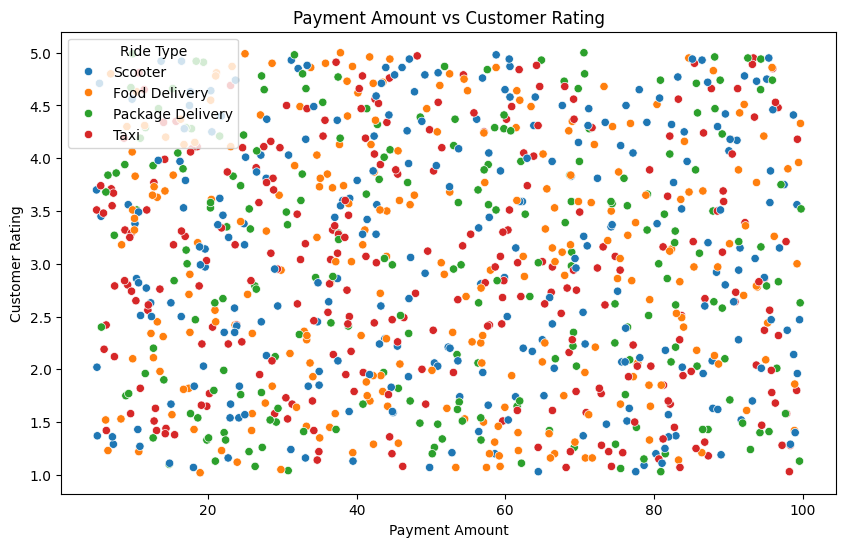

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_segment, x='payment_amount', y='customer_rating', hue='ride_type')
plt.title('Payment Amount vs Customer Rating')
plt.xlabel('Payment Amount')
plt.ylabel('Customer Rating')
plt.legend(title='Ride Type')
plt.show()

In [ ]:
# Comparison of Fraudulent and Non-Fraudulent Rides (Payment Amount and Cancellation Rate)

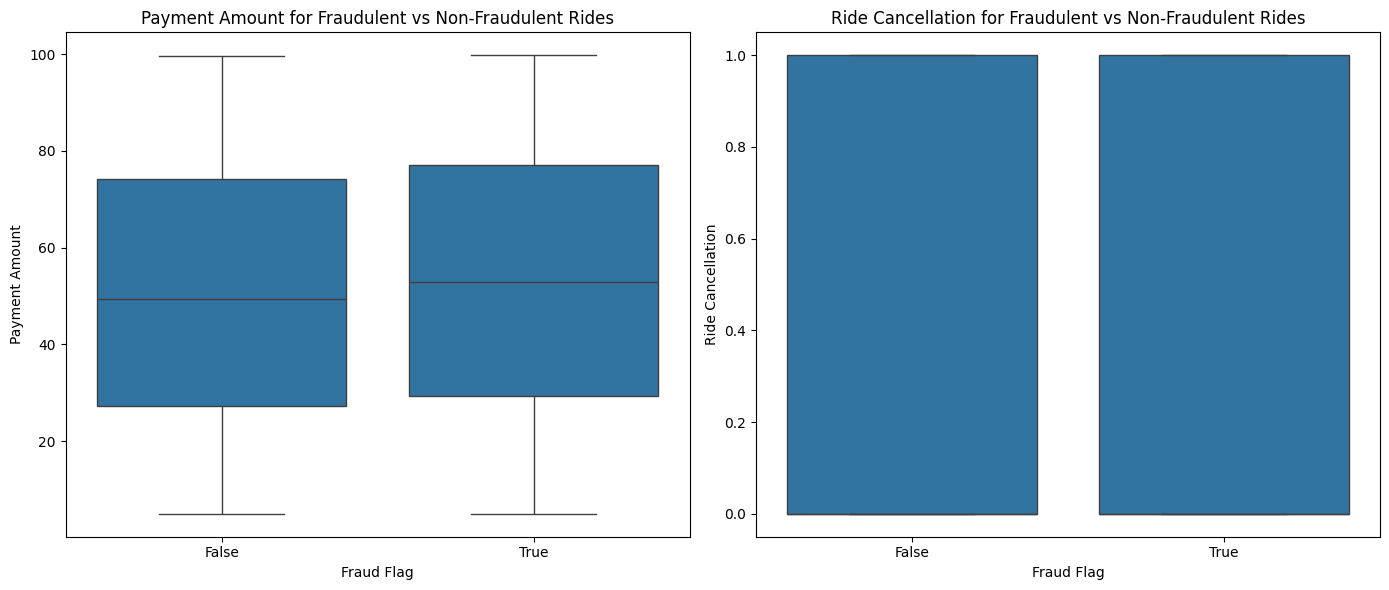

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.boxplot(data=customer_segment, x='fraud_flag', y='payment_amount', ax=axes[0])
axes[0].set_title('Payment Amount for Fraudulent vs Non-Fraudulent Rides')
axes[0].set_xlabel('Fraud Flag')
axes[0].set_ylabel('Payment Amount')


sns.boxplot(data=customer_segment, x='fraud_flag', y='ride_cancellation', ax=axes[1])
axes[1].set_title('Ride Cancellation for Fraudulent vs Non-Fraudulent Rides')
axes[1].set_xlabel('Fraud Flag')
axes[1].set_ylabel('Ride Cancellation')

plt.tight_layout()
plt.show()